Column names in the dataset: ['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

First 5 rows of the dataset:
    sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy: 1.0000
Error Rate: 0.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


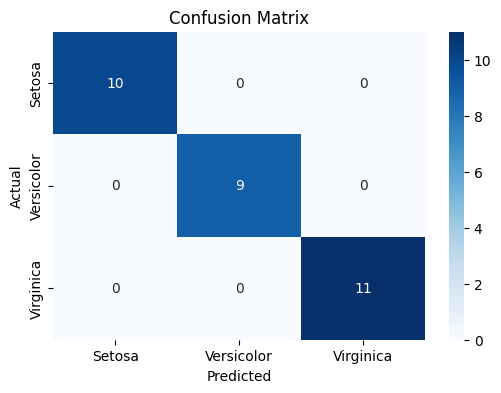


Class-wise TP, FP, FN, TN:

Class 'Setosa':
  TP (True Positive): 10
  FP (False Positive): 0
  FN (False Negative): 0
  TN (True Negative): 20

Class 'Versicolor':
  TP (True Positive): 9
  FP (False Positive): 0
  FN (False Negative): 0
  TN (True Negative): 21

Class 'Virginica':
  TP (True Positive): 11
  FP (False Positive): 0
  FN (False Negative): 0
  TN (True Negative): 19


In [1]:
# -----------------------------------------
# 🧰 Step 1: Import Required Python Libraries
# -----------------------------------------

import pandas as pd                  # For loading and handling tabular data
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For plotting charts
import seaborn as sns                # For advanced visualizations

from sklearn.model_selection import train_test_split    # For splitting dataset
from sklearn.naive_bayes import GaussianNB              # Naive Bayes classifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# -----------------------------------------
# 📥 Step 2: Load the Iris Dataset
# -----------------------------------------

df = pd.read_csv("iris.csv")  # Load iris dataset (make sure the file is in the same folder)

# Show column names to verify structure
print("Column names in the dataset:", df.columns.tolist())

# Display first few rows
print("\nFirst 5 rows of the dataset:\n", df.head())

# -----------------------------------------
# 🧹 Step 3: Preprocessing
# -----------------------------------------

# Features = all columns except 'variety'; Target = 'variety'
X = df.drop('variety', axis=1)
y = df['variety']

# -----------------------------------------
# 🧪 Step 4: Split into Training and Testing Sets
# -----------------------------------------

# 80% training data, 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------------------
# 🤖 Step 5: Train Naive Bayes Classifier
# -----------------------------------------

model = GaussianNB()          # Create Naive Bayes model (Gaussian for continuous data)
model.fit(X_train, y_train)   # Train the model

# -----------------------------------------
# 🔍 Step 6: Make Predictions
# -----------------------------------------

y_pred = model.predict(X_test)  # Predict on test data

# -----------------------------------------
# 📊 Step 7: Evaluate Model with Confusion Matrix and Metrics
# -----------------------------------------

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# -----------------------------------------
# 🖼️ Step 8: Visualize Confusion Matrix
# -----------------------------------------

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# -----------------------------------------
# 🧮 Step 9: Manually Compute TP, FP, FN, TN for Each Class
# -----------------------------------------

labels = model.classes_  # Get class labels from model

print("\nClass-wise TP, FP, FN, TN:")

for i, label in enumerate(labels):
    TP = cm[i][i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    print(f"\nClass '{label}':")
    print(f"  TP (True Positive): {TP}")
    print(f"  FP (False Positive): {FP}")
    print(f"  FN (False Negative): {FN}")
    print(f"  TN (True Negative): {TN}")
